In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf,pacf , adfuller
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='rainbow')
plt.rcParams['figure.figsize'] = (10,5)

# Data

In [4]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',index_col=0)

In [5]:
df

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


# Visualization

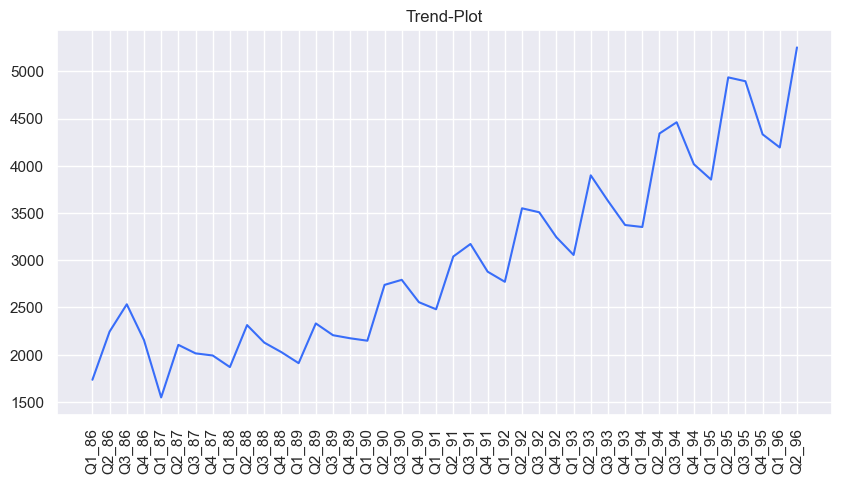

In [7]:
plt.plot(df.index,df['Sales'].values)
plt.title('Trend-Plot')
plt.xticks(rotation=90)
plt.show()

In [8]:
adf = adfuller(df['Sales'])
adf[1]

0.9966611673930905

#### Observation :
We can clearly see that there is upward trend and multiplicative seasonality.
#### ARIMA Models can only work with stationary data.

#### To make out data stationary we do something like differencing.

In [9]:
# differencing
df['First-Order']= df['Sales'].diff()
df

,Sales,First-Order
Quarter,,
Q1_86,1734.827000,NaN
Q2_86,2244.960999,510.133999
Q3_86,2533.804993,288.843994
Q4_86,2154.962997,-378.841995
Q1_87,1547.818996,-607.144001
Q2_87,2104.411995,556.592999
Q3_87,2014.362999,-90.048996
Q4_87,1991.746998,-22.616001
Q1_88,1869.049999,-122.696999


In [10]:
df.dropna(inplace=True)

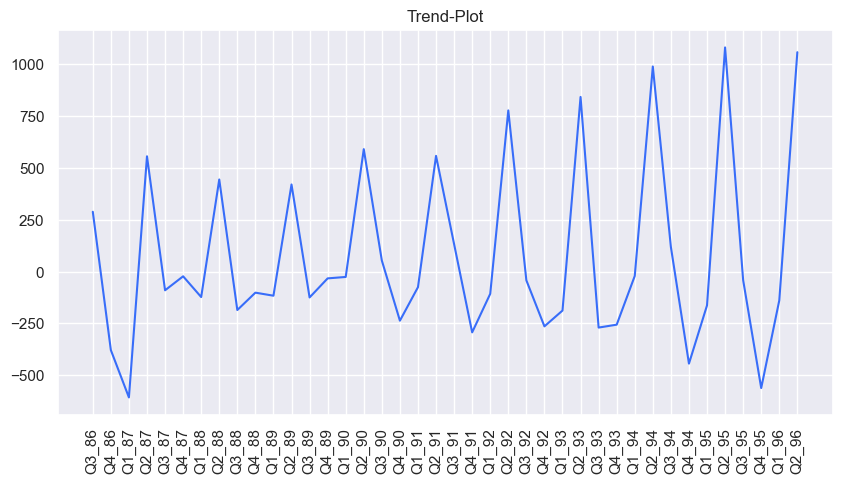

In [16]:
plt.plot(df.index[1:],df['First-Order'][1:].values)
plt.title('Trend-Plot')
plt.xticks(rotation=90)
plt.show()

#### Observation :
We can observe that we can see seasonality but not trend.

In [13]:
df['Second-Order']=df['First-Order'].diff()
df

,Sales,First-Order,Second-Order
Quarter,,,
Q2_86,2244.960999,510.133999,NaN
Q3_86,2533.804993,288.843994,-221.290005
Q4_86,2154.962997,-378.841995,-667.685989
Q1_87,1547.818996,-607.144001,-228.302006
Q2_87,2104.411995,556.592999,1163.737000
Q3_87,2014.362999,-90.048996,-646.641994
Q4_87,1991.746998,-22.616001,67.432995
Q1_88,1869.049999,-122.696999,-100.080997
Q2_88,2313.631996,444.581997,567.278996


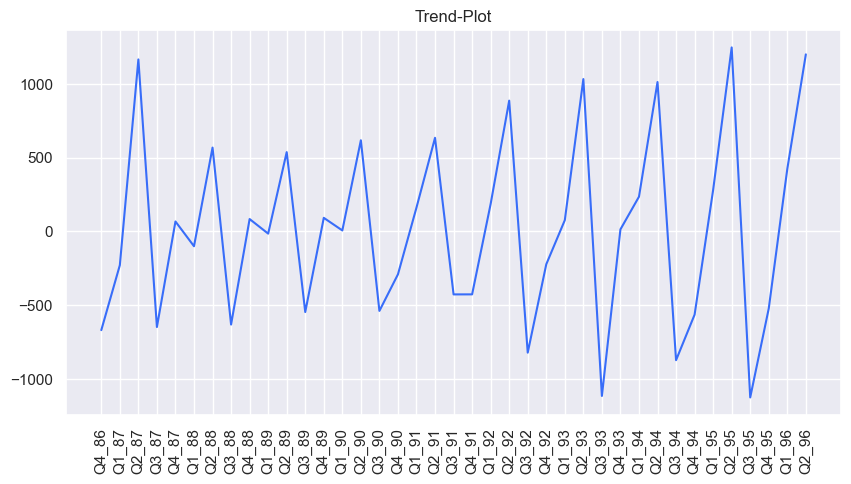

In [17]:
plt.plot(df.index[2:],df['Second-Order'][2:].values)
plt.title('Trend-Plot')
plt.xticks(rotation=90)
plt.show()

# ACF & PACF

In [28]:
#ACF
acfs = acf(df['First-Order'][1:],nlags=45)
acfs

array([ 1.        , -0.14409513, -0.57170403, -0.10400604,  0.76380591,
       -0.1402042 , -0.457687  , -0.07701951,  0.63511668, -0.09409276,
       -0.36835133, -0.08137268,  0.53089971, -0.12857864, -0.34575132,
       -0.03510271,  0.46318074, -0.10638963, -0.27693454, -0.02671113,
        0.37998825, -0.11962809, -0.20689211, -0.03242511,  0.29979659,
       -0.10107996, -0.13234426, -0.00412983,  0.21194515, -0.1010173 ,
       -0.1493148 ,  0.00686816,  0.1863793 , -0.10998563, -0.1075776 ,
        0.05903108,  0.11945695, -0.09594017, -0.06652755,  0.02839454])

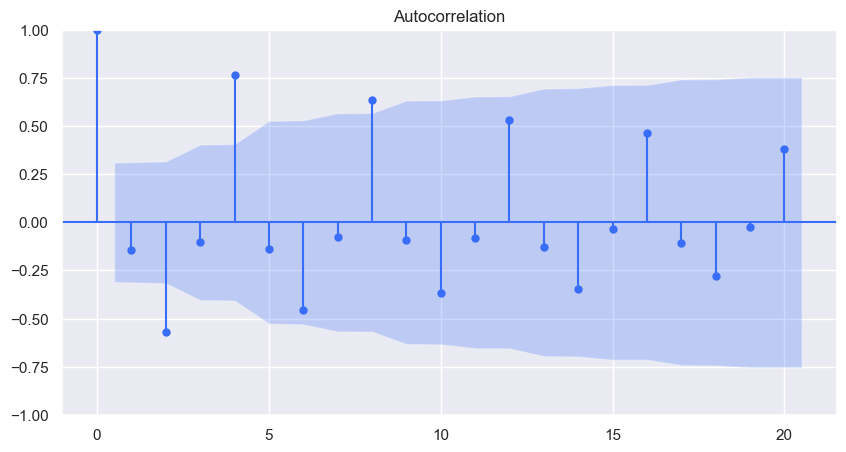

In [29]:
plot_acf(df['First-Order'][1:],lags=20);

#### Observation :
Significant change over the interval of 4 lags variable

In [30]:
#PACFS
pacfs = pacf(df['First-Order'][1:],nlags=19)
pacfs

array([ 1.        , -0.14778987, -0.63756107, -0.60684809,  0.58951786,
       -0.08882705,  0.06289995, -0.11919694,  0.23964962,  0.19819753,
        0.18711211,  0.01369417,  0.25612476, -0.29534853, -0.39462106,
       -0.2652037 , -0.10810793,  0.05222329,  0.14093511, -0.02182503])

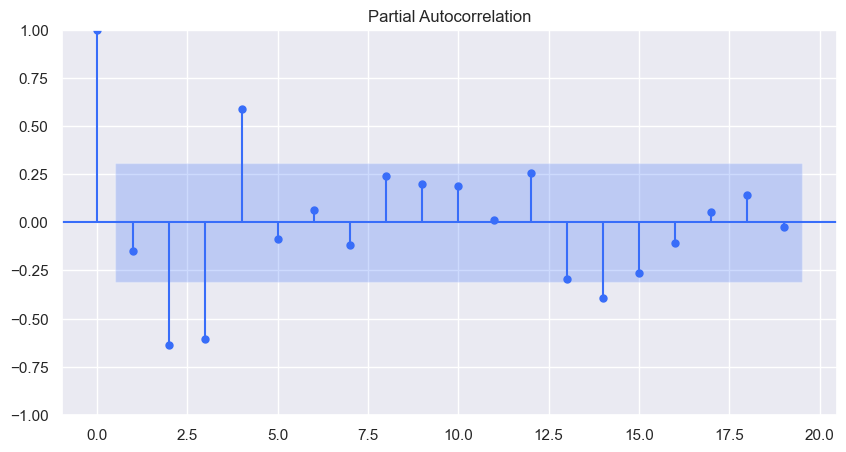

In [31]:
plot_pacf(df['First-Order'][1:],lags=19);

#### Observation :
We can see direct correlation with 4 lags variable.

In [32]:
#ACF2
acfs = acf(df['Second-Order'][2:],nlags=18)
acfs

array([ 1.        , -0.25064299, -0.38745473, -0.23334552,  0.76208901,
       -0.19676657, -0.30586683, -0.19642888,  0.62357953, -0.15060865,
       -0.24647725, -0.15710987,  0.52872633, -0.14341256, -0.24101043,
       -0.10890481,  0.45207665, -0.12761365, -0.1866105 ])

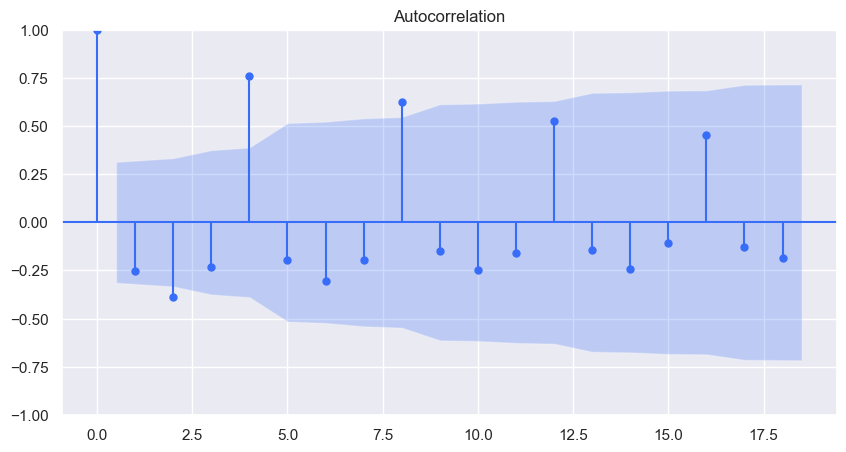

In [33]:
plot_acf(df['Second-Order'][2:],lags=18);

In [35]:
# PACF
pacfs_2 = pacf(df['Second-Order'][2:],nlags=18)
pacfs_2

array([ 1.        , -0.25723885, -0.50819848, -0.78244804,  0.4385525 ,
       -0.14389581, -0.08358594, -0.17539103,  0.08016887, -0.03077827,
       -0.03162247,  0.00819298,  0.2599667 , -0.00158114, -0.23913651,
       -0.04694803,  0.0861926 , -0.09266457,  0.10377652])

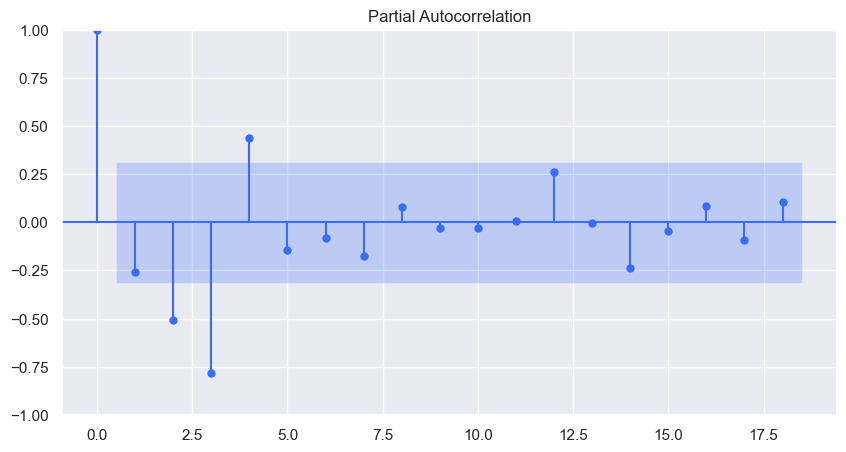

In [36]:

plot_pacf(df['Second-Order'][2:],lags=18);

# Model

In [37]:
to_row = int(len(df)*0.8)+1
train = df.iloc[:to_row]
test = df.iloc[to_row:]

## Model using intutions

In [39]:
n_forecast = len(test)
train_list = list(train['Sales'].values)
preds=[]
for i in tqdm(range(n_forecast)):
    model = ARIMA(train_list,order=(4,1,1))
    model = model.fit()
    forecast = model.forecast()
    preds.append(forecast[0])
    train_list.pop(0)
    train_list.append(forecast[0])

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.99it/s]


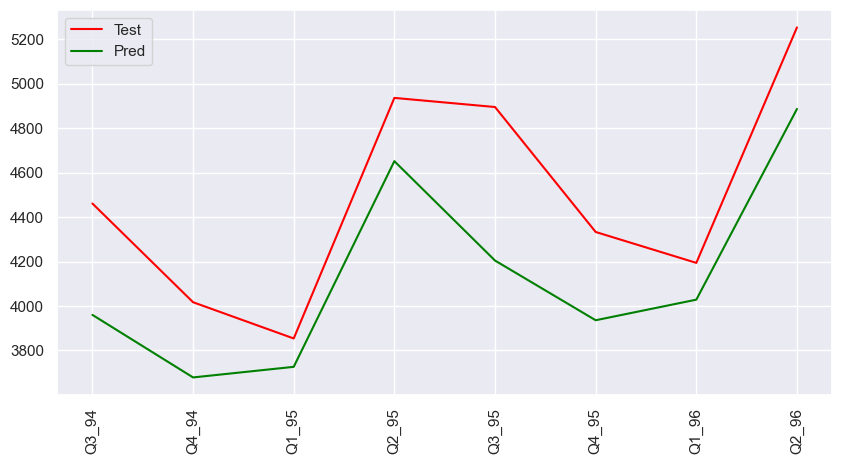

In [40]:
plt.plot(test.index,test['Sales'].values,color='red',label='Test')
plt.plot(test.index,preds,color='green',label='Pred')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [41]:
mse = np.sqrt(mean_squared_error(test['Sales'].values,preds))
mse

396.70100861075946

## Using Auto ARIMA

In [42]:
from pmdarima import auto_arima

In [43]:
order = auto_arima(df['Sales'])
order

ARIMA(order=(3, 2, 2), scoring_args={}, suppress_warnings=True)

In [44]:
n_forecast=len(test)
train_list = list(train['Sales'].values)
preds=[]
for i in tqdm(range(n_forecast)):
    model = ARIMA(train_list,order=(3,1,2))
    model = model.fit()
    forecast = model.forecast()
    preds.append(forecast[0])
    train_list.pop(0)
    train_list.append(forecast[0])

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.90it/s]


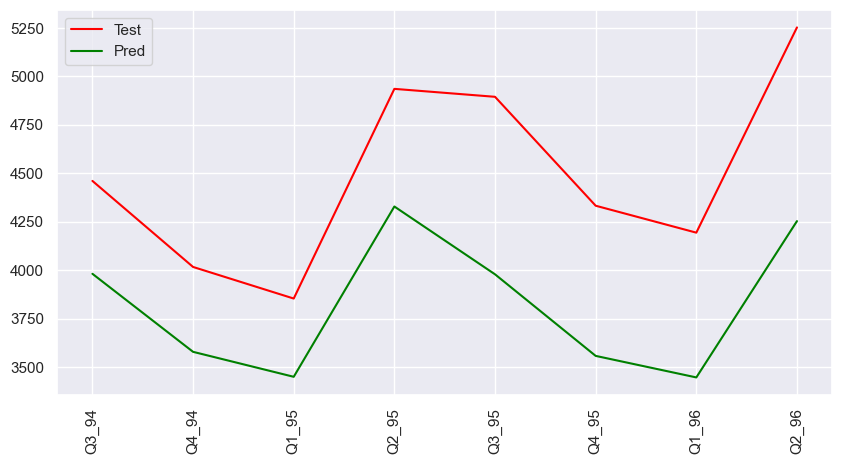

In [45]:
plt.plot(test.index,test['Sales'].values,color='red',label='Test')
plt.plot(test.index,preds,color='green',label='Pred')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [46]:
mse2 = np.sqrt(mean_squared_error(test['Sales'].values,preds))
mse2

702.6405251350551

Not better than my mse score

## Experimental Model

In [49]:
n_forecas=len(test)
train_list = list(train['Sales'].values)
preds=[]
for i in tqdm(range(n_forecast)):
    model = ARIMA(train_list,order=(4,1,3))
    model = model.fit()
    forecast = model.forecast()
    preds.append(forecast[0])
    train_list.pop(0)
    train_list.append(forecast[0])

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.33it/s]


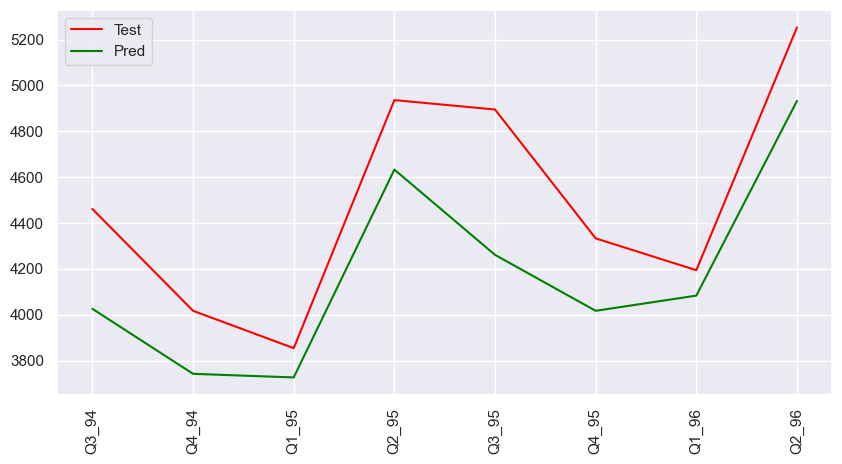

In [50]:
plt.plot(test.index,test['Sales'].values,color='red',label='Test')
plt.plot(test.index,preds,color='green',label='Pred')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [54]:
mse3 = np.sqrt(mean_squared_error(test['Sales'].values,preds))
mse3

351.8540350646713

In [55]:
out_data = {
    'Model': ['Intitution Model','Auto Arima Model','Experimental Model'],
    'Lag Variab4,1,1),(3,1,2),(4,1,3)],
    'MSE': [mse,mse2,mse3]
}

pd.DataFrame(out_data)

,Model,Lag Variable,Order,MSE
0,Intitution Model,12,"(12, 1, 12)",351.854035
1,Auto Arima Model,3,"(3, 1, 2)",702.640525
2,Experimental Model,12,"(12, 1, 4)",351.854035
